In [16]:
import pandas as pd
import plotly.express as px
#dataset link https://www.kaggle.com/tarunpaparaju/apple-aapl-historical-stock-data
#dataset link https://www.kaggle.com/vijayvvenkitesh/microsoft-stock-time-series-analysis

Im comparing Apple [AAPL] opening stock prices to Microsoft [MSFT] opening stock prices from 2015 to 2020

In [17]:
dfm = pd.read_csv('datasets/Microsoft_Stock.csv') #reading in my .csv as dataframes
dfa = pd.read_csv('datasets/apple.csv')
dfm

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [18]:
dfa['Date'] = pd.to_datetime(dfa['Date']) # i need to make each a dattime value for both dataframes
dfm['Date'] = pd.to_datetime(dfm['Date'])
dfm['Date'] = dfm['Date'].dt.date # i now need to strip off the timestamp on the microsoft dataframe
dfm['Date'] = pd.to_datetime(dfm['Date']) #now i put back to datetime
dfm

,Date,Open,High,Low,Close,Volume
0,2015-04-01,40.60,40.76,40.31,40.72,36865322
1,2015-04-02,40.66,40.74,40.12,40.29,37487476
2,2015-04-06,40.34,41.78,40.18,41.55,39223692
3,2015-04-07,41.61,41.91,41.31,41.53,28809375
4,2015-04-08,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,2021-03-25,235.30,236.94,231.57,232.34,34061853
1507,2021-03-26,231.55,236.71,231.55,236.48,25479853
1508,2021-03-29,236.59,236.80,231.88,235.24,25227455
1509,2021-03-30,233.53,233.85,231.10,231.85,24792012


In [19]:
dfm.dtypes #checking the types in the microsoft dataframe

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [20]:
dfm.head() #recording starts on april 2015

,Date,Open,High,Low,Close,Volume
0,2015-04-01,40.60,40.76,40.31,40.72,36865322
1,2015-04-02,40.66,40.74,40.12,40.29,37487476
2,2015-04-06,40.34,41.78,40.18,41.55,39223692
3,2015-04-07,41.61,41.91,41.31,41.53,28809375
4,2015-04-08,41.48,41.69,41.04,41.42,24753438


In [21]:
dfa.tail() #recording starts on march 2010. So wee need to filter this dataframe to match up with microsfot one to have the same amount of data.

,Date,Close/Last,Volume,Open,High,Low
2513,2010-03-05,$31.28,224647427,$30.71,$31.39,$30.66
2514,2010-03-04,$30.10,89591907,$29.90,$30.13,$29.80
2515,2010-03-03,$29.90,92846488,$29.85,$29.98,$29.71
2516,2010-03-02,$29.84,141486282,$29.99,$30.12,$29.68
2517,2010-03-01,$29.86,137312041,$29.39,$29.93,$29.35


In [22]:
dfa = dfa.query('20150401 < Date < 20210331') #by using a query we can easily filter the apple data frame to have the same date range!
dfa.head()

,Date,Close/Last,Volume,Open,High,Low
0,2020-02-28,$273.36,106721200,$257.26,$278.41,$256.37
1,2020-02-27,$273.52,80151380,$281.10,$286,$272.96
2,2020-02-26,$292.65,49678430,$286.53,$297.88,$286.50
3,2020-02-25,$288.08,57668360,$300.95,$302.53,$286.13
4,2020-02-24,$298.18,55548830,$297.26,$304.18,$289.23


In [23]:
dfm = dfm.rename(columns={"Open": "Microsoft"}) #renaming the column  names 
dfa = dfa.rename(columns={"Open":"Apple"})
dfa

,Date,Close/Last,Volume,Apple,High,Low
0,2020-02-28,$273.36,106721200,$257.26,$278.41,$256.37
1,2020-02-27,$273.52,80151380,$281.10,$286,$272.96
2,2020-02-26,$292.65,49678430,$286.53,$297.88,$286.50
3,2020-02-25,$288.08,57668360,$300.95,$302.53,$286.13
4,2020-02-24,$298.18,55548830,$297.26,$304.18,$289.23
...,...,...,...,...,...,...
1231,2015-04-09,$126.56,32244360,$125.85,$126.58,$124.66
1232,2015-04-08,$125.60,37272090,$125.85,$126.40,$124.97
1233,2015-04-07,$126.01,34894810,$127.64,$128.12,$125.98
1234,2015-04-06,$127.35,36917490,$124.47,$127.51,$124.33


In [24]:
dfa['Apple'] = dfa['Apple'].replace({'\$':''}, regex = True) #i needed to get rid of the '$' in the apple dataframe
dfa

,Date,Close/Last,Volume,Apple,High,Low
0,2020-02-28,$273.36,106721200,257.26,$278.41,$256.37
1,2020-02-27,$273.52,80151380,281.10,$286,$272.96
2,2020-02-26,$292.65,49678430,286.53,$297.88,$286.50
3,2020-02-25,$288.08,57668360,300.95,$302.53,$286.13
4,2020-02-24,$298.18,55548830,297.26,$304.18,$289.23
...,...,...,...,...,...,...
1231,2015-04-09,$126.56,32244360,125.85,$126.58,$124.66
1232,2015-04-08,$125.60,37272090,125.85,$126.40,$124.97
1233,2015-04-07,$126.01,34894810,127.64,$128.12,$125.98
1234,2015-04-06,$127.35,36917490,124.47,$127.51,$124.33


In [25]:
dfa.dtypes #checking types again

Date           datetime64[ns]
 Close/Last            object
 Volume                 int64
Apple                  object
 High                  object
 Low                   object
dtype: object

In [26]:
dfa['Apple'] = dfa['Apple'].astype(float).round(2) #ropunding the opening price to two. Not really necessacary but nice to do as it looks cleaner. Especially since its a dollar value. 
dfa.dtypes

Date           datetime64[ns]
 Close/Last            object
 Volume                 int64
Apple                 float64
 High                  object
 Low                   object
dtype: object

In [27]:
dfm = dfm[['Date', 'Microsoft']]  #selecting only the open and date
dfa = dfa[['Date', 'Apple']]#selecting only the open and date
dfstock = pd.merge(dfm, dfa, how='right') #merging into a singular dataframe on the date. 
dfstock

,Date,Microsoft,Apple
0,2020-02-28,152.41,257.26
1,2020-02-27,163.32,281.10
2,2020-02-26,169.71,286.53
3,2020-02-25,174.20,300.95
4,2020-02-24,167.77,297.26
...,...,...,...
1231,2015-04-09,41.25,125.85
1232,2015-04-08,41.48,125.85
1233,2015-04-07,41.61,127.64
1234,2015-04-06,40.34,124.47


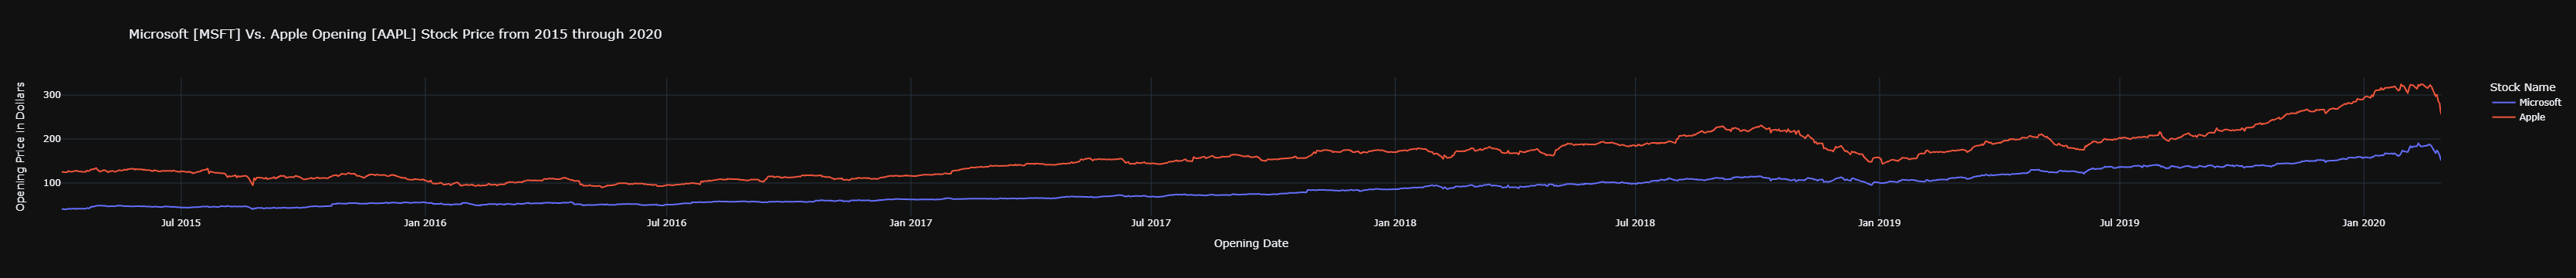

In [28]:
fig = px.line(dfstock, x='Date', y=['Microsoft','Apple'],title='Microsoft [MSFT] Vs. Apple Opening [AAPL] Stock Price from 2015 through 2020', template="plotly_dark")  #ploting our new mergered dataframe with multiple y args         
fig.update_xaxes(title_text='Opening Date') #new lables
fig.update_yaxes(title_text='Opening Price in Dollars')#new lables
fig.update_layout(legend_title_text='Stock Name')#new lables
fig.show()
                                  